In [63]:
pip install wordcloud 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except ImportError:
    WORDCLOUD_AVAILABLE = False
    print("WordCloud not installed. Please run: pip install wordcloud")

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
sns.set(style='whitegrid')

In [65]:
# Load data
FILE_PATH = r'F:\Git\Internship\dataset\OnlineRetail.csv'
df = pd.read_csv(FILE_PATH, encoding='ISO-8859-1')

In [66]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [68]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [69]:
# Clean data
df.columns = [c.strip() for c in df.columns]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Sales'] = df['Quantity'] * df['UnitPrice']
df = df.drop_duplicates()
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)
df['Description'] = df['Description'].fillna('UNKNOWN')
df['is_return'] = df['Quantity'] <= 0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int32         
 7   Country      401604 non-null  object        
 8   Sales        401604 non-null  float64       
 9   is_return    401604 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 29.5+ MB


In [71]:
# Descriptive statistics
print("\n--- Descriptive Statistics ---")
print(df[['Quantity','UnitPrice','Sales']].describe().T)


--- Descriptive Statistics ---
              count       mean         std       min   25%    50%    75%  \
Quantity   401604.0  12.183273  250.283037  -80995.0  2.00   5.00  12.00   
UnitPrice  401604.0   3.474064   69.764035       0.0  1.25   1.95   3.75   
Sales      401604.0  20.613638  430.352218 -168469.6  4.25  11.70  19.80   

                max  
Quantity    80995.0  
UnitPrice   38970.0  
Sales      168469.6  


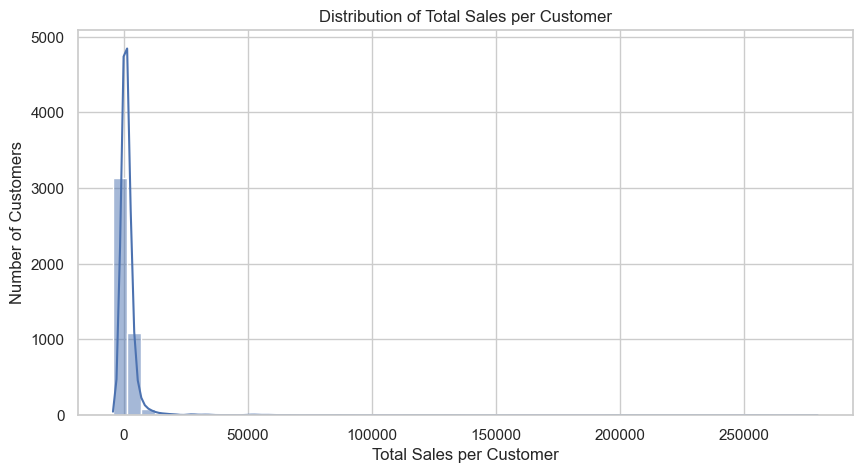

In [72]:
# Histogram of total sales per customer
customer_sales = df.groupby('CustomerID')['Sales'].sum()
plt.figure(figsize=(10,5))
sns.histplot(customer_sales, bins=50, kde=True)
plt.xlabel('Total Sales per Customer')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Sales per Customer')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15584\358415467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette="viridis")


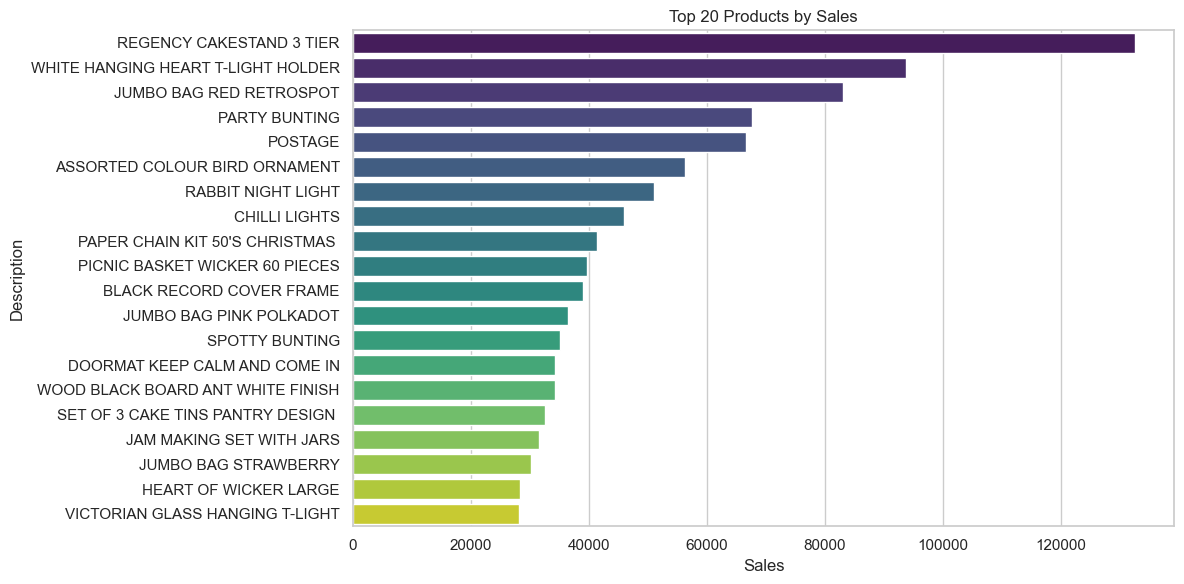

In [73]:
# Top products by sales
sales_by_product = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index, palette="viridis")
plt.xlabel('Sales')
plt.title('Top 20 Products by Sales')
plt.tight_layout()
plt.show()

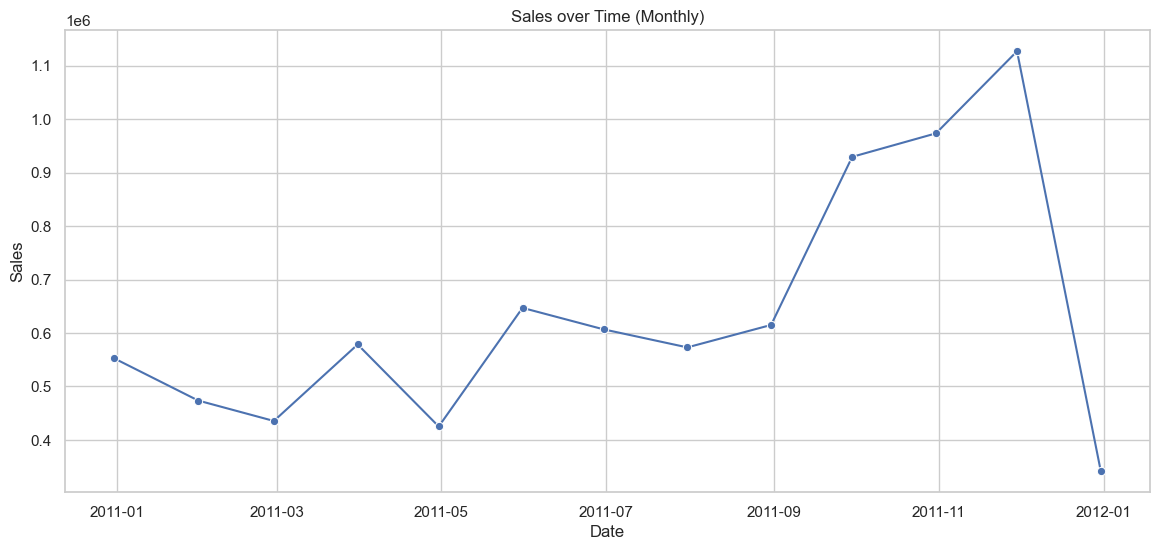

In [74]:
# Sales over time (monthly)
sales_over_time = df.set_index('InvoiceDate').resample('M')['Sales'].sum()
plt.figure(figsize=(14,6))
sns.lineplot(x=sales_over_time.index, y=sales_over_time.values, marker="o")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales over Time (Monthly)')
plt.show()

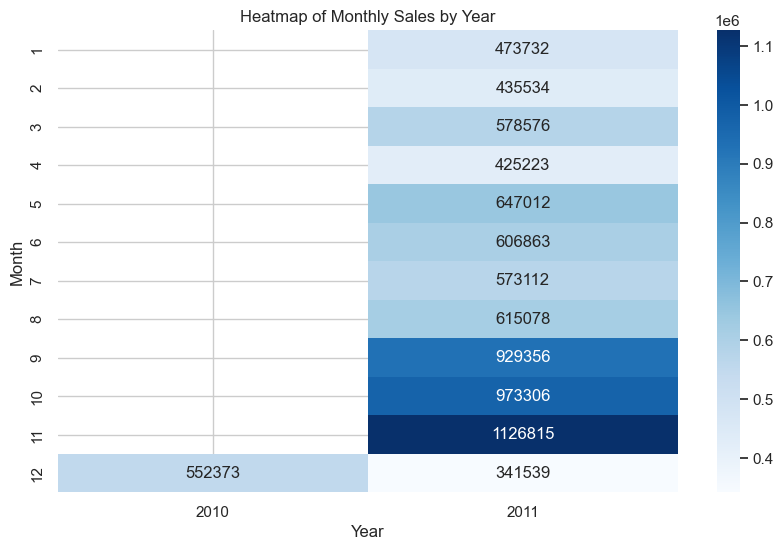

In [75]:
# Heatmap of sales by month and year
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
heatmap_data = df.pivot_table(index='Month', columns='Year', values='Sales', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Blues")
plt.title('Heatmap of Monthly Sales by Year')
plt.show()

In [76]:
# Top 10 customers
print("\n--- Top 10 Customers by Sales ---")
print(df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False).head(10))


--- Top 10 Customers by Sales ---
CustomerID
14646    279489.02
18102    256438.49
17450    187322.17
14911    132458.73
12415    123725.45
14156    113214.59
17511     88125.38
16684     65892.08
13694     62690.54
15311     59284.19
Name: Sales, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15584\3013256660.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly.index, y=monthly.values, palette="coolwarm")


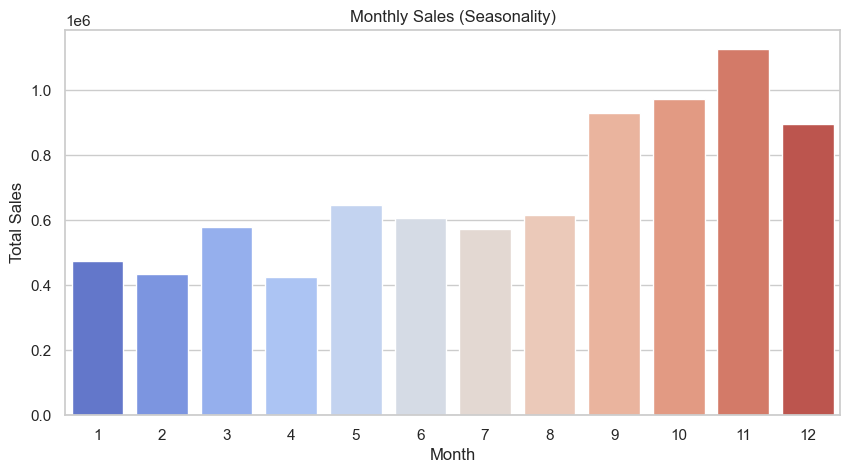

In [77]:
# Monthly seasonality
monthly = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=monthly.index, y=monthly.values, palette="coolwarm")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales (Seasonality)')
plt.show()

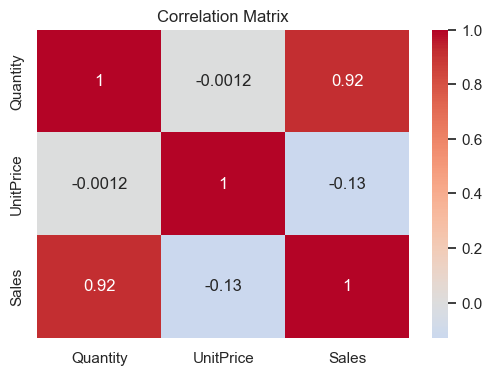

In [78]:
# Correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity','UnitPrice','Sales']].corr(), annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Matrix')
plt.show()

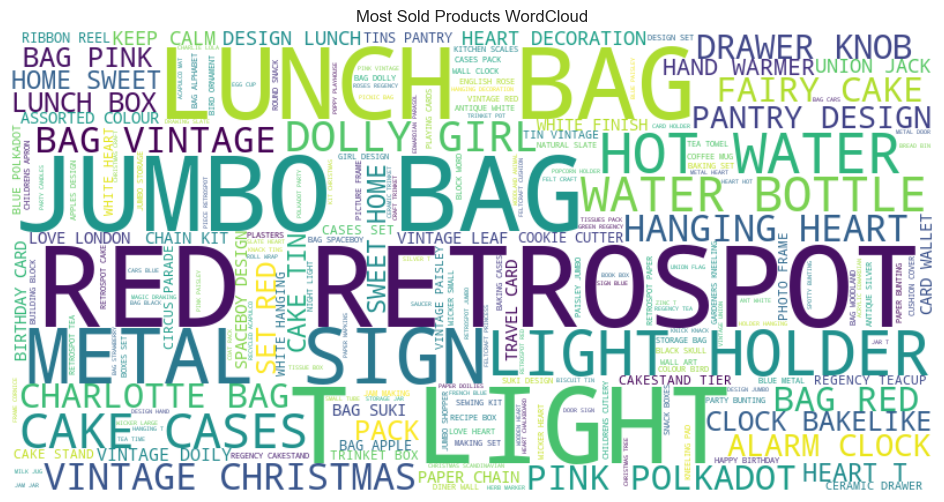

In [79]:
# WordCloud of most sold products
text = " ".join(desc for desc in df['Description'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Sold Products WordCloud')
plt.show()

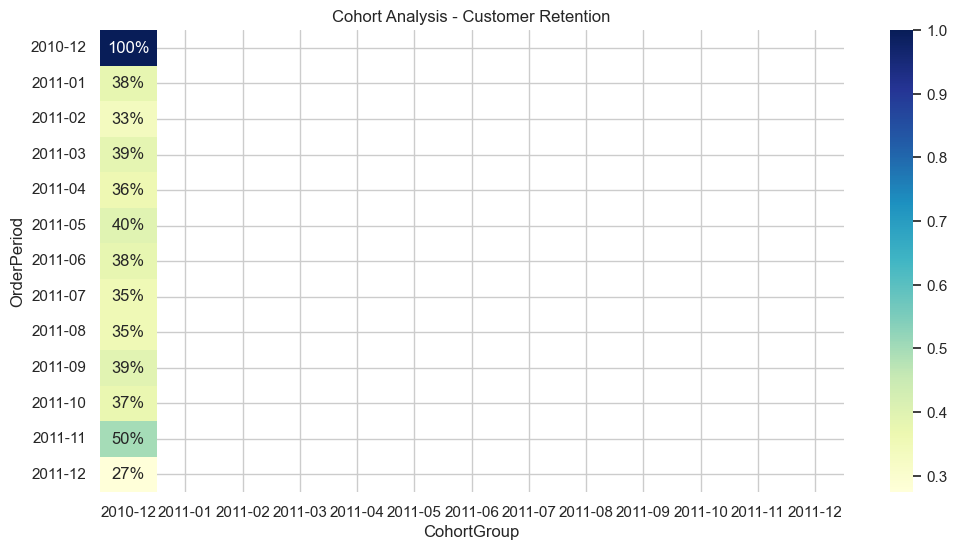

In [80]:
# Cohort Analysis: Retention of customers
cohort_df = df[['CustomerID','InvoiceDate']].copy()
cohort_df['OrderPeriod'] = cohort_df['InvoiceDate'].dt.to_period('M')
cohort_df['CohortGroup'] = cohort_df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
cohort_pivot = cohort_df.groupby(['CohortGroup','OrderPeriod']).nunique()['CustomerID'].unstack(0)
cohort_size = cohort_pivot.iloc[0]
retention = cohort_pivot.divide(cohort_size, axis=1)
plt.figure(figsize=(12,6))
sns.heatmap(retention, cmap="YlGnBu", annot=True, fmt=".0%")
plt.title('Cohort Analysis - Customer Retention')
plt.show()

In [81]:
# Suggested Insights
print("\n--- Suggested Insights ---")
print("Total sales in dataset:", df['Sales'].sum())
print("Unique customers:", df['CustomerID'].nunique())
print("Unique products:", df['Description'].nunique())
print("Highest sales month:", monthly.idxmax(), "with", monthly.max())
print("Top selling product:", sales_by_product.index[0], "with sales", sales_by_product.iloc[0])


--- Suggested Insights ---
Total sales in dataset: 8278519.4240000015
Unique customers: 4372
Unique products: 3896
Highest sales month: 11 with 1126815.07
Top selling product: REGENCY CAKESTAND 3 TIER with sales 132567.69999999998


In [82]:
df.to_csv(r"F:\Git\Internship\dataset\clean_retail_data.csv", index=False)
